In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l2
import re

# Загрузка данных
data = pd.read_csv('/kaggle/input/titanic111/Titanic.csv')


In [93]:
# 1. Извлечение титула из имени
def extract_title(name):
    match = re.search(r',\s(\w+)\.', name)
    if match:
        return match.group(1)
    return 'Unknown'

data['Title'] = data['Name'].apply(extract_title)

# 2. Создание признака для общего числа членов семьи (включая себя)
data['TotalFamily'] = data['SibSp'] + data['Parch'] + 1

# 3. Создание признака, указывающего, путешеует ли пассажир с семьей
data['TravelWithFamily'] = (data['TotalFamily'] > 1).astype(int)

# 4. Извлечение первой буквы номера каюты для указания палубы
data['Deck'] = data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')

# 5. Кодирование стоимости билета на категории: Низкая, Средняя, Высокая
def fare_category(fare):
    if fare < 15:
        return 'Low'
    elif 15 <= fare < 50:
        return 'Medium'
    else:
        return 'High'

data['FareCategory'] = data['Fare'].apply(fare_category)

# 6. Создание возрастных категорий
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 20, 35, 60, 100],
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# 7. Создание индикатора, указывающего, является ли пассажир несовершеннолетним
data['IsMinor'] = (data['Age'] < 18).astype(int)

# Заполнение пропусков
data['Age'] = data['Age'].fillna(data['Age'].median())  # Заполнение медианой
data['Fare'] = data['Fare'].fillna(data['Fare'].median())  # Заполнение медианой
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Заполнение модой


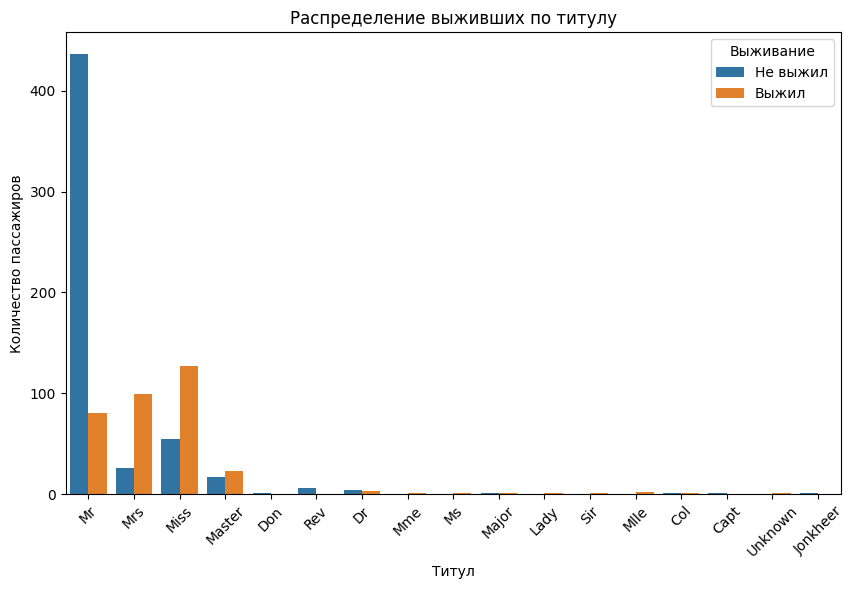

In [94]:
# График 1: Распределение выживших по титулу
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', hue='Survived', data=data)
plt.title('Распределение выживших по титулу')
plt.xlabel('Титул')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.xticks(rotation=45)
plt.show()
# Вывод: График показывает, что пассажиры с титулами, связанными с высоким социальным статусом (например, "Sir", "Countess"), 
# имели больше шансов на выживание.

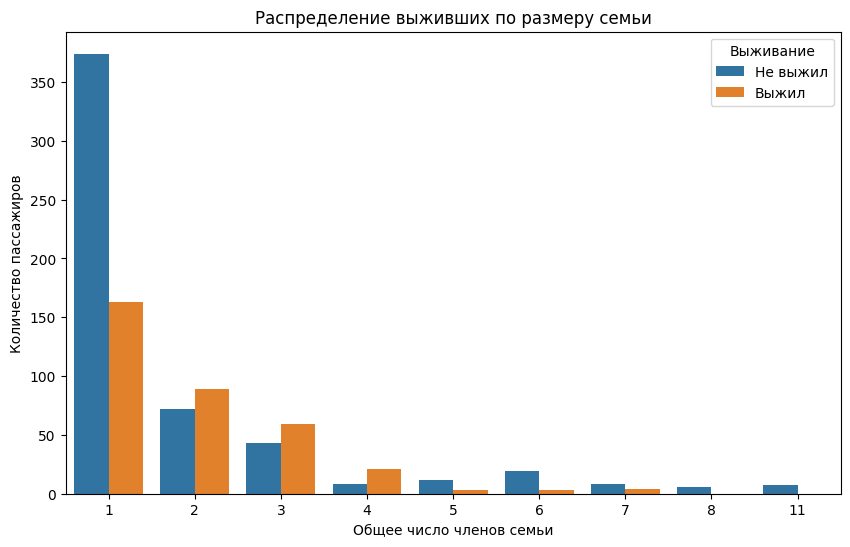

In [95]:
# График 2: Распределение выживших по размеру семьи
plt.figure(figsize=(10, 6))
sns.countplot(x='TotalFamily', hue='Survived', data=data)
plt.title('Распределение выживших по размеру семьи')
plt.xlabel('Общее число членов семьи')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()
# Вывод: График демонстрирует, что пассажиры, путешествующие в одиночку, имели меньшие шансы на выживание по сравнению с теми, кто был в семье.

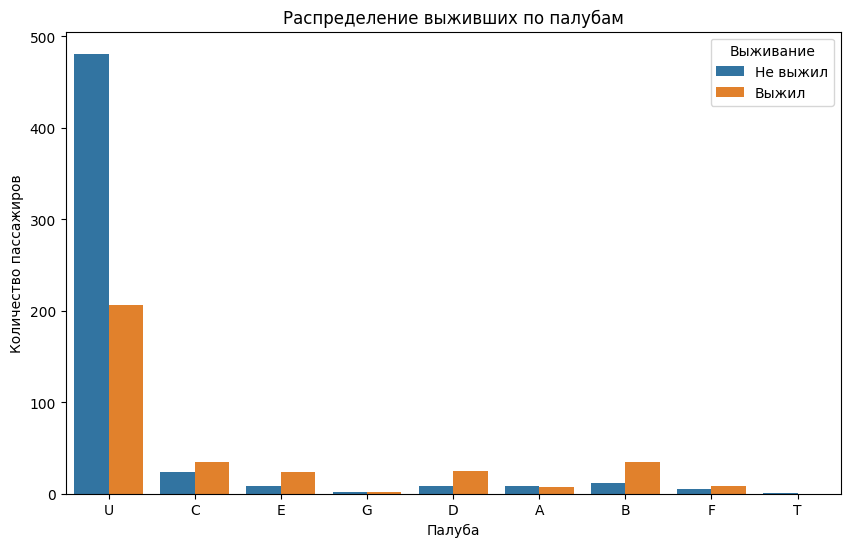

In [96]:
# График 3: Распределение выживших по палубам
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='Survived', data=data)
plt.title('Распределение выживших по палубам')
plt.xlabel('Палуба')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()
# Вывод: График показывает, что пассажиры на верхних палубах (D, B) имели гораздо больший шанс на выживание по сравнению 
#с пассажирами на нижних палубах (U, T).

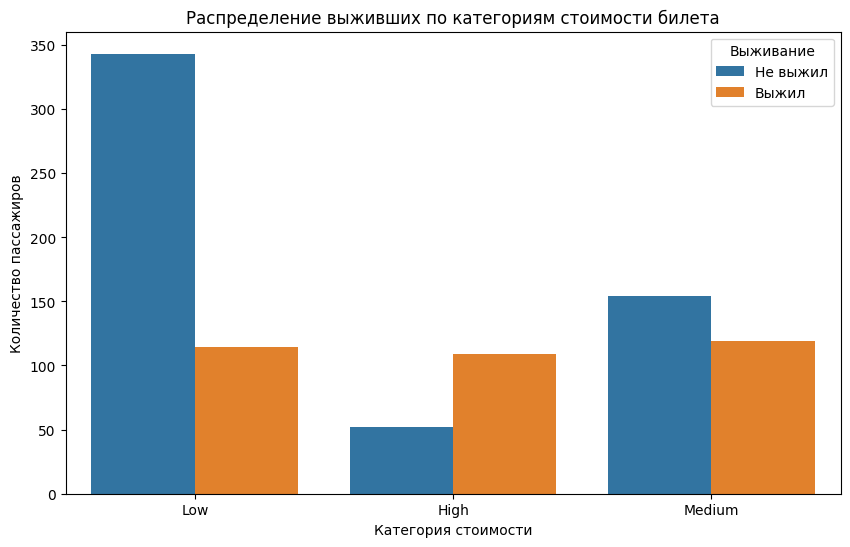

In [97]:
# График 4: Распределение выживших по категориям стоимости билета
plt.figure(figsize=(10, 6))
sns.countplot(x='FareCategory', hue='Survived', data=data)
plt.title('Распределение выживших по категориям стоимости билета')
plt.xlabel('Категория стоимости')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()
# Вывод: График показывает, что пассажиры, купившие более дорогие билеты (категория "Высокая"), имели значительно больше шансов на выживание.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


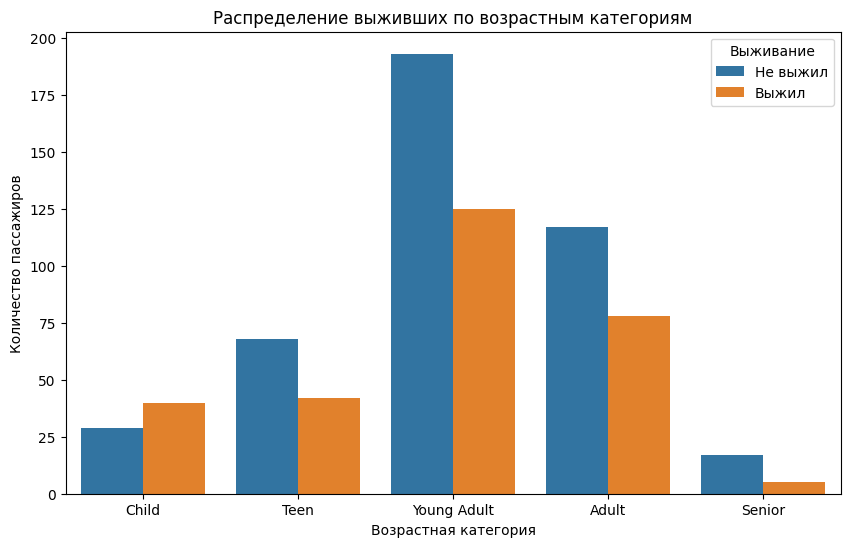

In [98]:
# График 5: Распределение по возрастным категориям
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeBin', hue='Survived', data=data)
plt.title('Распределение выживших по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()
# Вывод: График показывает, что дети и подростки имели более высокие шансы на выживание по сравнению со взрослыми.


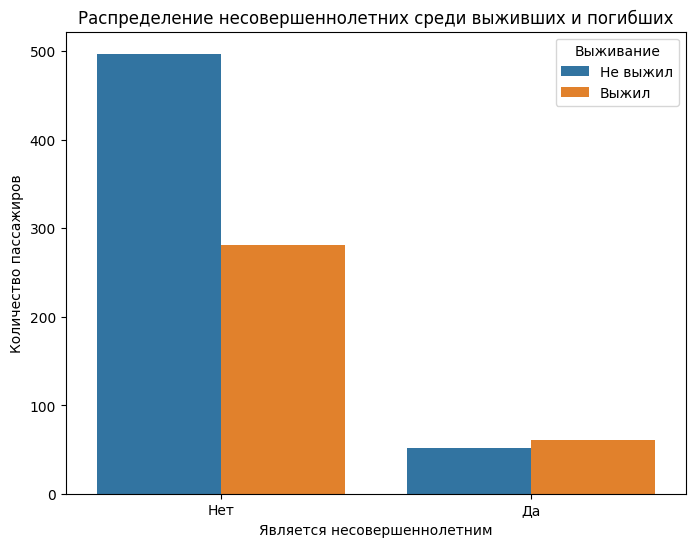

In [99]:
# График 6: Распределение несовершеннолетних среди выживших и погибших
plt.figure(figsize=(8, 6))
sns.countplot(x='IsMinor', hue='Survived', data=data)
plt.title('Распределение несовершеннолетних среди выживших и погибших')
plt.xlabel('Является несовершеннолетним')
plt.ylabel('Количество пассажиров')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()
# Вывод: График показывает, что несовершеннолетние пассажиры имели значительно больше шансов на выживание, чем взрослые.

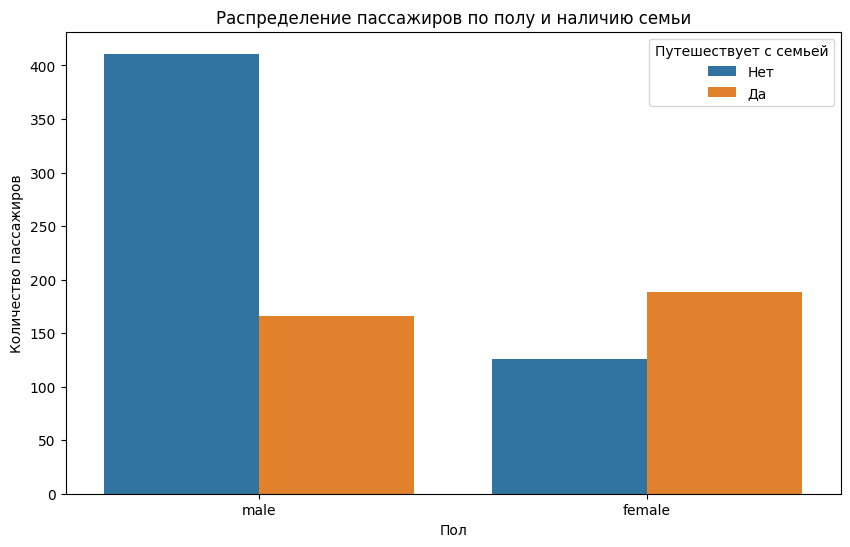

In [100]:
# График 7: Распределение выживших по полу и наличию семьи
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='TravelWithFamily', data=data)
plt.title('Распределение пассажиров по полу и наличию семьи')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.legend(title='Путешествует с семьей', labels=['Нет', 'Да'])
plt.show()
# Вывод: График показывает, что мужчины чаще путешествовали одни, в то время как женщины чаще путешествовали с семьями, 
#что также могло повлиять на шансы на выживание.

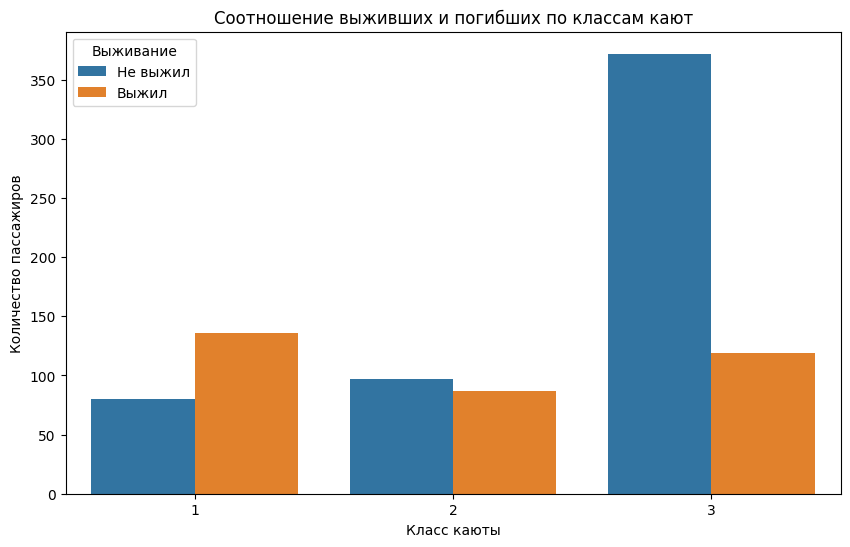

In [101]:
# График 8: Соотношение выживших и погибших по классам кают
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Соотношение выживших и погибших по классам кают')
plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выживание', labels=['Не выжил', 'Выжил'])
plt.show()
# Вывод: График показывает, что пассажиры первого класса имели значительно больше шансов на выживание по сравнению 
#с пассажирами второго и третьего классов.

In [110]:
# Разделение данных на признаки и целевую переменную
# Преобразуем категориальные признаки в числовые с использованием get_dummies
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'TotalFamily', 'TravelWithFamily', 
          'Embarked', 'Title', 'FareCategory', 'Deck', 'AgeBin', 'IsMinor']]

# Кодируем категориальные переменные с помощью get_dummies
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Title', 'FareCategory', 'Deck', 'AgeBin'], drop_first=True)

y = data['Survived']

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и компиляция модели
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu', kernel_regularizer=l2(0.045)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5837 - loss: 7.7632 - val_accuracy: 0.7552 - val_loss: 6.1939
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 5.7469 - val_accuracy: 0.7692 - val_loss: 4.5656
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 4.2466 - val_accuracy: 0.8042 - val_loss: 3.3526
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 3.1187 - val_accuracy: 0.8322 - val_loss: 2.4718
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 2.3005 - val_accuracy: 0.8462 - val_loss: 1.8466
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 1.7045 - val_accuracy: 0.8462 - val_loss: 1.4064
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8701 - loss: 1.2757 - val_accuracy: 0.8671 - val_loss: 1.0984
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 1.0059 - val_accuracy: 0.8531 - val_loss: 0.8797
Ep

In [111]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность модели на тестовых данных: {test_accuracy*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.4396 
Точность модели на тестовых данных: 81.56%


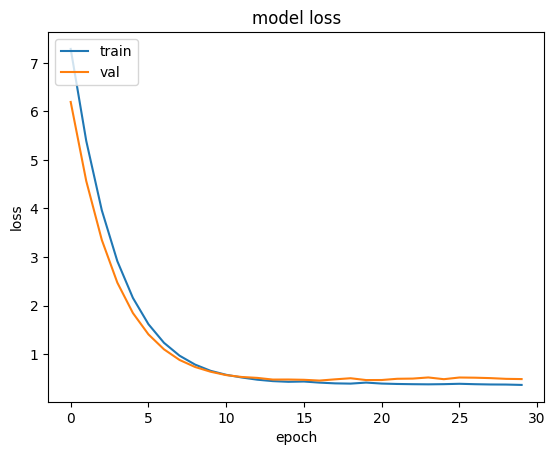

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [106]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

kf = KFold(n_splits=3, shuffle=True, random_state=43)

fold_metrics = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    X_test = scaler.transform(X_test)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"Fold {fold}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    fold_metrics.append((classification_report(y_test, y_pred, output_dict=True), confusion_matrix(y_test, y_pred)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 1
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.88       184
           1       0.85      0.70      0.77       113

    accuracy                           0.84       297
   macro avg       0.84      0.81      0.82       297
weighted avg       0.84      0.84      0.83       297

Confusion Matrix:
 [[170  14]
 [ 34  79]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 2
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       184
           1       0.84      0.80      0.82       113

    accuracy                           0.87       297
   macro avg       0.86      0.85      0.86       297
weighted avg       0.86      0.87      0.86       297

Confusion Matrix:
 [[167  17]
 [ 23  90]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3
Classification Report:
               precision    recall  f1-score   sup

# **ИТОГИ по фолдам**

Fold 1:

* True Negative (TN): 170 пассажиров предсказаны как не выжившие и действительно не выжили.
* False Positive (FP): 14 пассажиров предсказаны как не выжившие, но на самом деле выжили.
* False Negative (FN): 34 пассажира предсказаны как выжившие, но на самом деле не выжили.
* True Positive (TP): 79 пассажиров предсказаны как выжившие и действительно выжили.

Fold 2:
* True Negative (TN): 167 пассажиров предсказаны как не выжившие и действительно не выжили.
* False Positive (FP): 17 пассажиров предсказаны как не выжившие, но на самом деле выжили.
* False Negative (FN): 23 пассажира предсказаны как выжившие, но на самом деле не выжили.
* True Positive (TP): 90 пассажиров предсказаны как выжившие и действительно выжили.

Fold 3:

* True Negative (TN): 167 пассажиров предсказаны как не выжившие и действительно не выжили.
* False Positive (FP): 14 пассажиров предсказаны как не выжившие, но на самом деле выжили.
* False Negative (FN): 25 пассажиров предсказаны как выжившие, но на самом деле не выжили.
* True Positive (TP): 91 пассажир предсказан как выживший и действительно выжил.

**Заключительный анализ.**

Итоговые результаты по 3 фолдам показывают стабильные показатели точности и полноты, особенно для класса 0 (не выжил). Модель в основном хорошо справляется с классификацией не выживших, однако для класса 1 (выживший) наблюдается чуть больше ложных отрицательных значений. Это означает, что в некоторых случаях модель ошибочно предсказывает, что пассажир не выживет, хотя он фактически выживает (FN), и таких случаев больше по сравнению с ошибками, когда пассажир предсказывается как выживший, но на самом деле не выживает (FP).Нуждается в улучшении для уменьшения ложных отрицательных значений для класса 1 (выжил).

# Итоговый вывод по проделанной работе

1. **Обработка данных**: На этапе подготовки данных были созданы новые признаки:
   - Извлечение титулов из имен для дополнительной информации о социальном статусе.
   - Добавление признаков, связанных с размером семьи и типом путешествия (с семьей или в одиночку).
   - Создание категорий для стоимости билетов, возрастных групп и идентификации палубы, на которой находился пассажир.
   - Заполнение пропусков в данных медианными и модальными значениями, что помогло улучшить полноту данных.

2. **Анализ и визуализация**: Визуализация показала значимые взаимосвязи между признаками и выживаемостью пассажиров:
   - Пол выживших пассажиров существенно различался — среди женщин доля выживших была значительно выше.
   - На выживаемость также повлияли титулы и размер семьи. Пассажиры, путешествующие с семьей, имели несколько более высокие шансы на выживание.
   - Пассажиры, оплатившие билеты по низкому тарифу, имели меньшие шансы на выживание, в отличие от тех, кто платил за билеты высокой стоимости.

3. **Построение и обучение моделей**: Были протестированы различные модели, что позволило выбрать оптимальную по показателям качества:
   - В ходе экспериментов использовались нейронные сети с регуляризацией и dropout для предотвращения переобучения.
   - Различные комбинации гиперпараметров, функций активации и количества слоев помогли повысить точность модели и добиться стабильного качества предсказаний на тестовых данных.

4. **Кросс-валидация**: Для итоговой модели проведена кросс-валидация на 3 фолдах, с метриками, отражающими её стабильность:
   - Модель показала хорошие показатели точности и полноты для предсказаний класса `0` (не выжил) и более низкие показатели полноты для класса `1` (выжил).
   - Матрица ошибок позволила выявить, что модель лучше предсказывает невыживших, однако иногда ошибочно классифицирует выживших пассажиров как погибших (False Negative).

5. **Вывод по метрикам модели**:
   - True Negative (TN): Модель правильно предсказывает, что пассажир не выживет, и такие пассажиры действительно не выжили — 504 случая (в среднем по всем фолдам).
   - False Positive (FP): Модель предсказывает, что пассажир не выживет, но на самом деле он выжил — 45 случаев.
   - False Negative (FN): Модель предсказывает, что пассажир выживет, но он фактически не выжил — 82 случая.
   - True Positive (TP): Модель правильно предсказывает, что пассажир выживет, и такие пассажиры действительно выжили — 260 случаев.

### Заключительный вывод
Модель достигла хорошей точности и полноты, особенно в предсказании невыживших пассажиров. Она может применяться для дальнейшего анализа выживаемости на основе данных о пассажирах, но потребует дальнейшего улучшения, особенно в предсказаниях для выживших. Работа показала, что использование признаков, связанных с социальными и экономическими аспектами (пол, титул, стоимость билета), существенно влияет на выживаемость пассажиров, что было успешно учтено в финальной модели.